In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

from few.trajectory.inspiral import EMRIInspiral
from hierarchical.JointWave import JointRelKerrEccFlux

from few.utils.constants import YRSID_SI

traj = EMRIInspiral(func=JointRelKerrEccFlux)

In [2]:
T_LISA = 1. #LISA observation duration
dt = 10.0 #sampling rate

#cosmological parameters
cosmo_params={'Omega_m0':0.30,'Omega_Lambda0':0.70,'H0':70e3}

#Mstar normalization term for the EMRI MBH mass distribution
Mstar = 3e6

#True size of the population
Npop = int(1e3)

#detection SNR threshold
SNR_thresh = 20.0

#true values of population hyperparameters.
true_hyper={'K':0.005,'alpha':0.0,'beta':0.0, #vacuum hyperparameters
            'f':0.0,'mu_Al':1e-6,'mu_nl':8.0,'sigma_Al':1e-7,'sigma_nl':1.0, #local effect hyper
            'Gdot':1e-12 #global effect hyper
           }

In [6]:
filename = f'Hierarchical_Npop_{Npop}_f_{true_hyper['f']}_Gdot_{true_hyper['Gdot']}_K_{true_hyper['K']}_alpha_{true_hyper['alpha']}_beta_{true_hyper['beta']}' #folder with all the analysis data and plots
detected_EMRIs = np.load(os.path.join(filename,'detected_EMRIs.npy'),allow_pickle=True)

In [8]:
[detected_EMRIs[i]['local_params'] for i in range(len(detected_EMRIs))]

[array([ 1.40615347e+01,  1.75749080e-01,  9.45327539e-09, -4.94933385e+05,
         0.00000000e+00]),
 array([1.46705378e+01, 3.25311350e-01, 1.66782188e-09, 1.30105016e+02,
        0.00000000e+00]),
 array([1.37508136e+01, 3.60465394e-01, 1.31506946e-08, 4.39703423e+03,
        0.00000000e+00]),
 array([ 1.45473509e+01,  6.07383453e-01,  2.80531910e-09, -4.14349946e+02,
         0.00000000e+00]),
 array([1.29185937e+01, 3.41396279e-01, 6.73349456e-09, 7.78642375e+07,
        0.00000000e+00]),
 array([ 1.41415098e+01,  5.27960329e-01,  1.40597303e-09, -3.72642314e+04,
         0.00000000e+00]),
 array([ 1.41288832e+01,  6.59588213e-01,  3.67136763e-09, -1.57891751e+06,
         0.00000000e+00]),
 array([ 1.32458186e+01,  4.99159833e-01,  1.38412346e-08, -1.50582241e+06,
         0.00000000e+00]),
 array([ 1.47846051e+01,  5.16182768e-01,  2.44579233e-09, -8.92530155e+05,
         0.00000000e+00]),
 array([1.47115167e+01, 1.61299898e-01, 1.64652263e-09, 2.80981702e+04,
        0.000000

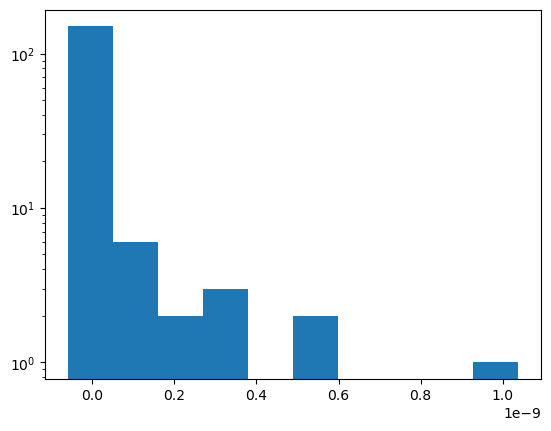

In [65]:
Ags_all = []
for i in range(len(detected_EMRIs)):
    Ags_all.append(detected_EMRIs[i]["global_params"][-1])
    
Ags_all = np.array(Ags_all)
plt.hist(Ags_all)
plt.yscale('log')

5.809369120693352e-14 5.292587151080869e-13


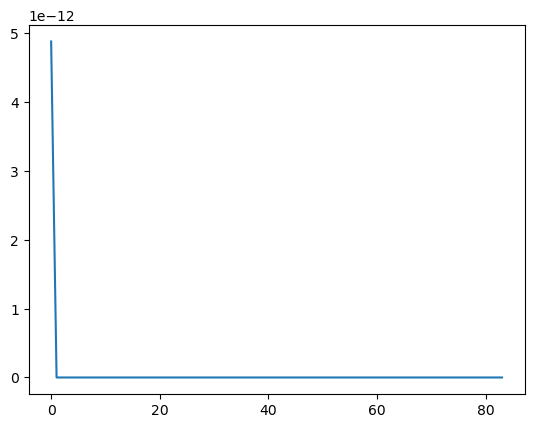

In [67]:
mask = (Ags_all<5e-12) & (Ags_all>-5e-12)
print(np.mean(Ags_all[mask]), np.std(Ags_all[mask]))
plt.plot(Ags_all[mask])

100%|█████████████████████████████████████████| 164/164 [00:11<00:00, 13.76it/s]


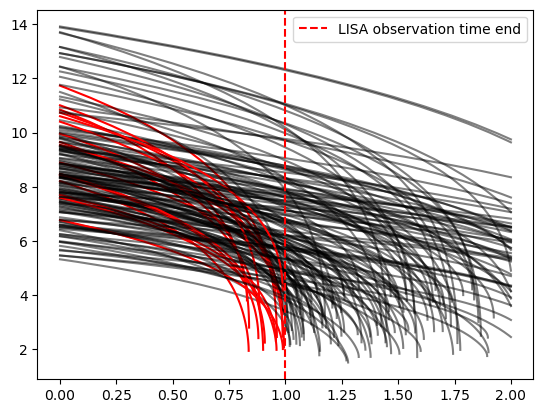

fraction of plunging EMRIs:  0.0975609756097561


In [10]:
count_plunge = 0

for i in tqdm(range(len(detected_EMRIs))):
    params_all = detected_EMRIs[i]['true_params']

    m1 = params_all[0]
    m2 = params_all[1]
    a = params_all[2]
    p0 = params_all[3]
    e0 = params_all[4]
    x0 = params_all[5]
    Al = params_all[-4]
    nl = params_all[-3]
    Ag = params_all[-2]
    ng = params_all[-1]

    t, p, e, x, pp, pt, pr = traj(m1, m2, a, p0, e0, x0, Al, nl, Ag, ng, T = T_LISA + 1, dt = dt)

    if t[-1] < T_LISA * YRSID_SI:
        count_plunge += 1
        plt.plot(t/YRSID_SI, p, c = 'r')

    else:
        plt.plot(t/YRSID_SI, p, c = 'k', alpha = 0.5)
    
plt.axvline(T_LISA, linestyle='--', color='red', label='LISA observation time end')
plt.legend()
plt.savefig(f"{filename}/fractional_plunging_EMRIs.png", dpi=300, bbox_inches = 'tight')
plt.show()

print("fraction of plunging EMRIs: ", count_plunge / len(detected_EMRIs))